In [217]:
'''Importing Packages'''
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import dates
from IPython.display import Markdown as md
import statsmodels.tsa.stattools as ts
import statsmodels.api as sm
import datetime
from statsmodels.api import stats as sm
from loess import loess_1d
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from openpyxl import Workbook, load_workbook
from sklearn import linear_model
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from scipy.linalg import toeplitz
import math
import scipy.stats as stats
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
%matplotlib inline

\pagebreak

# Find the eight mysterious series $y_{1t}, ..., y_{8t}$ in the EXCEL file, mysticseries.xlsx. For each of the series,

## a. Plot the time-series plot, ACF and PACF. {-}

In [218]:
'''importing the data'''

mystic = pd.read_excel('mysticseries.xlsx', index_col='t')

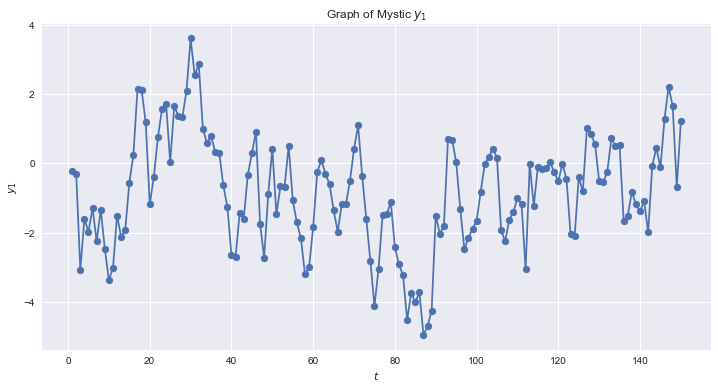

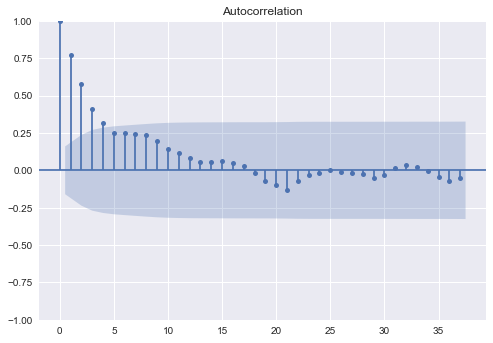

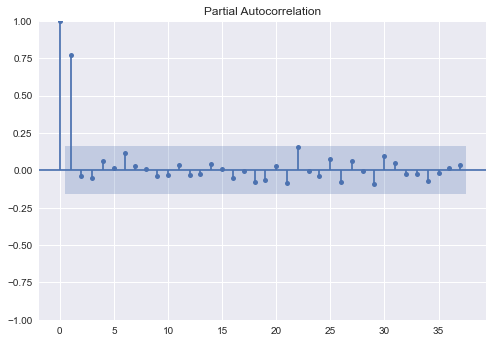

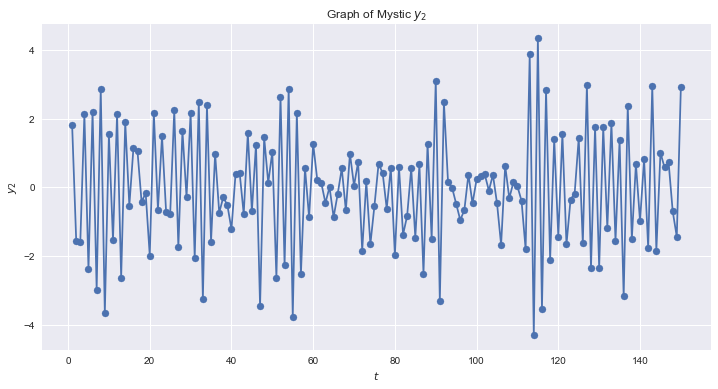

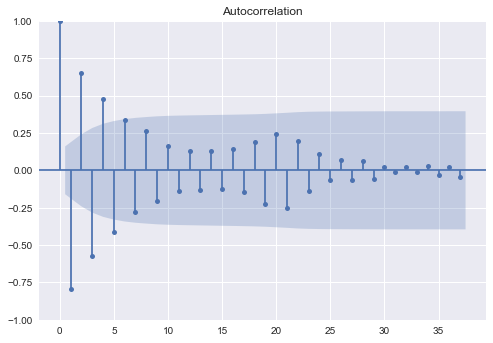

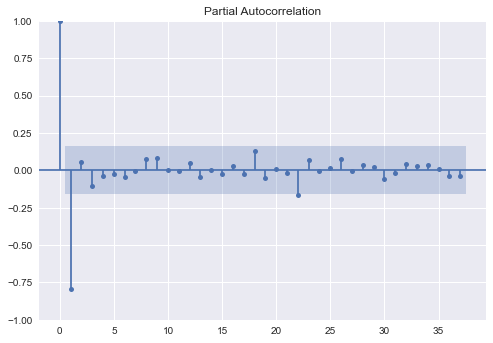

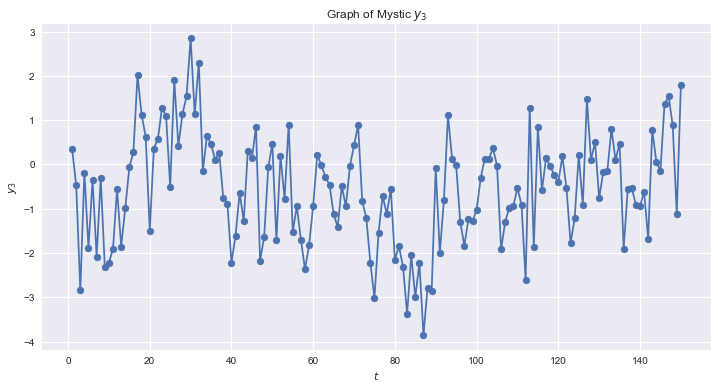

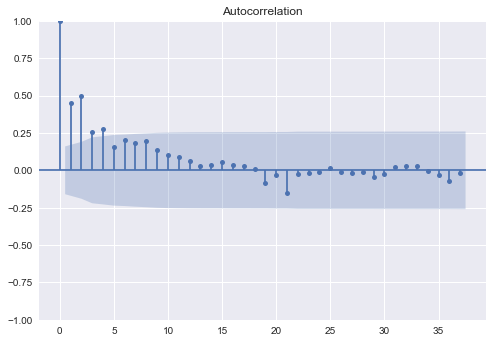

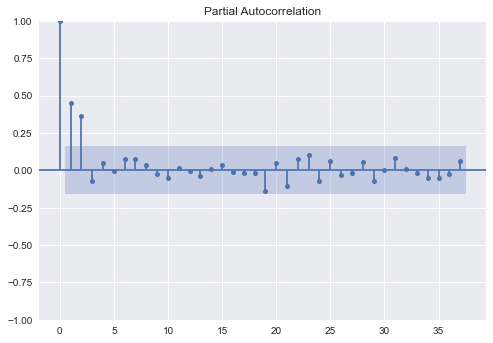

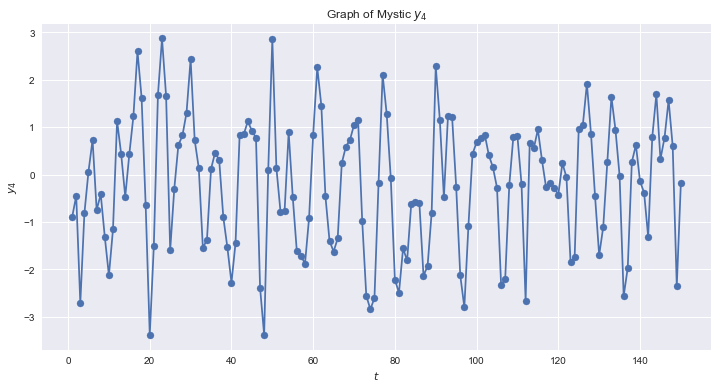

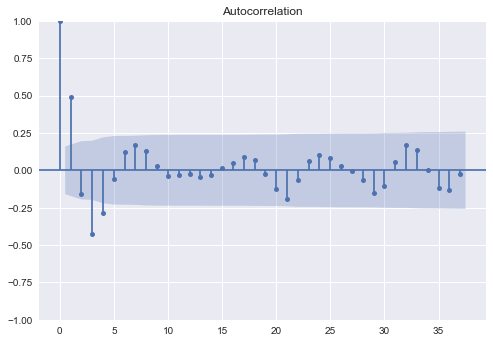

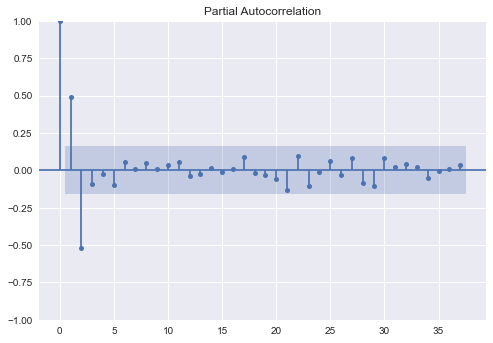

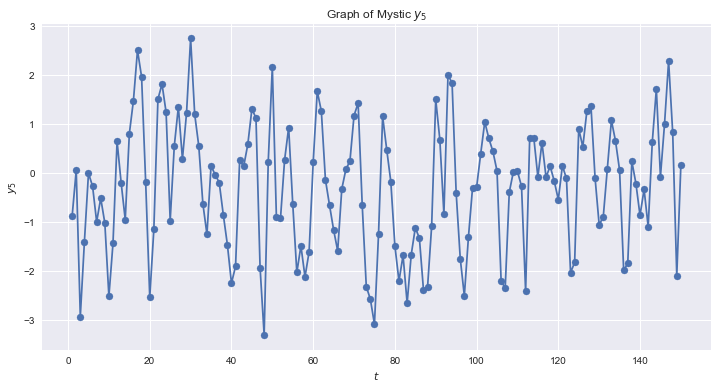

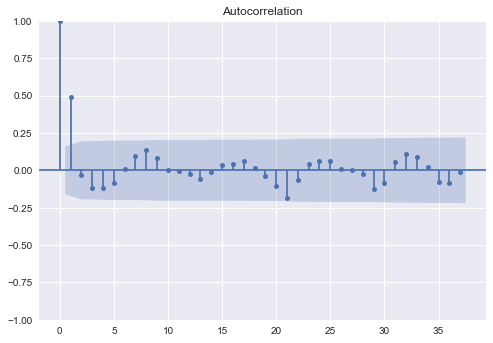

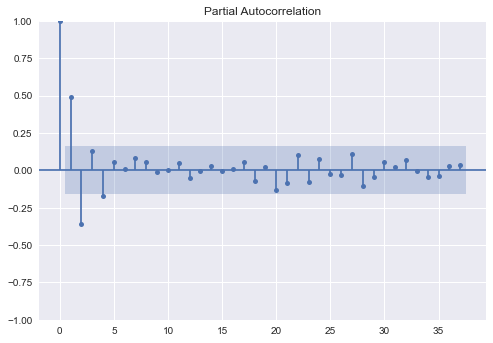

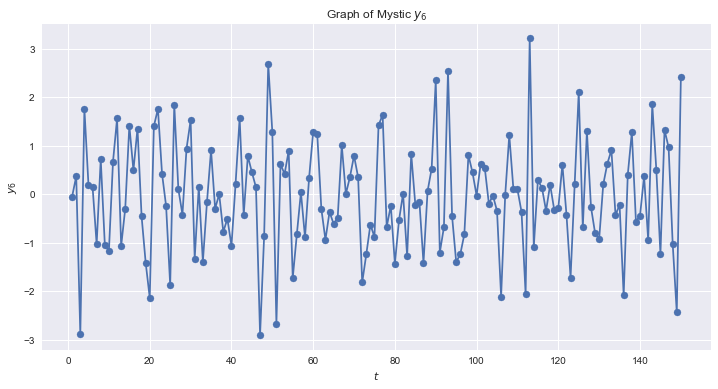

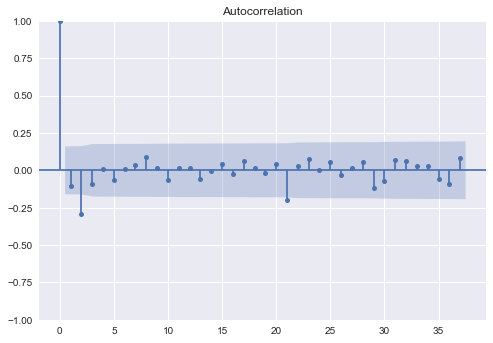

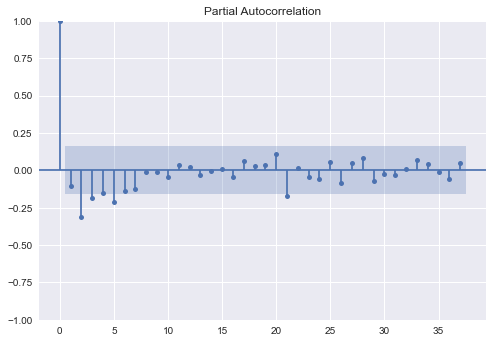

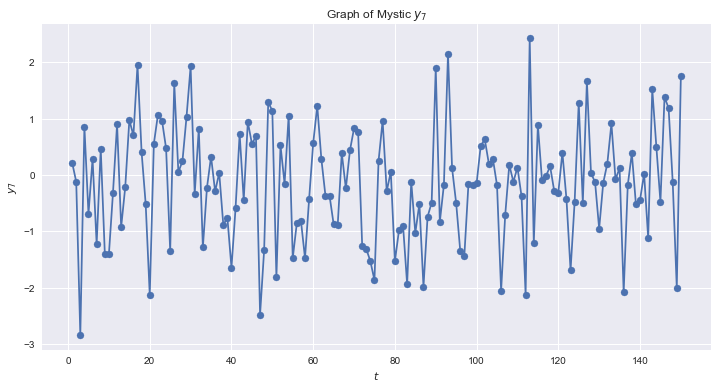

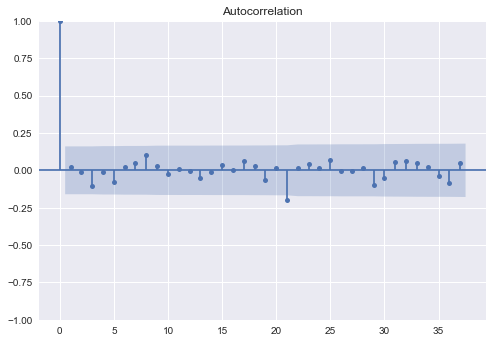

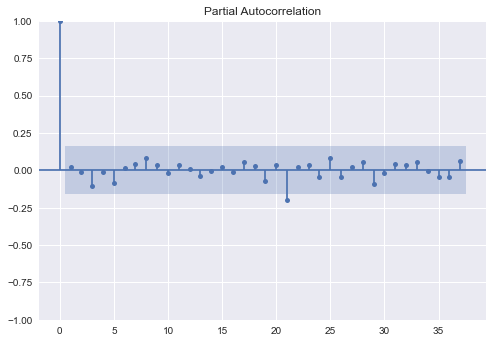

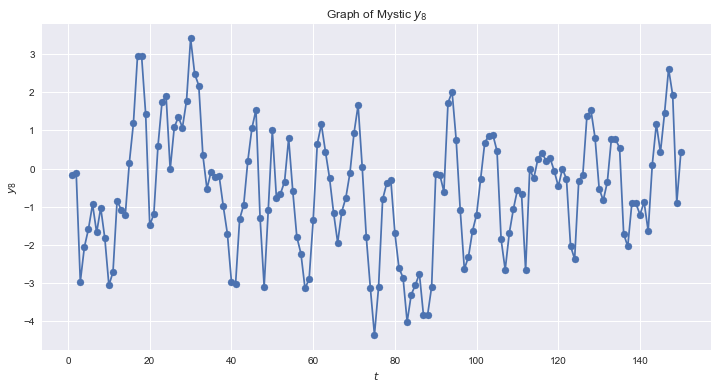

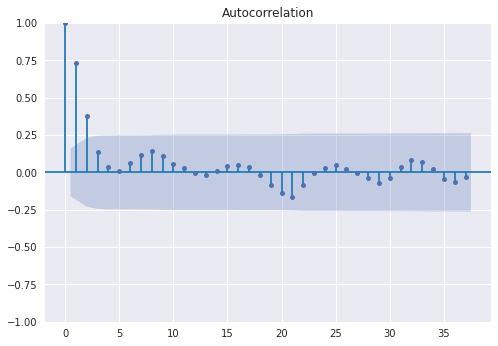

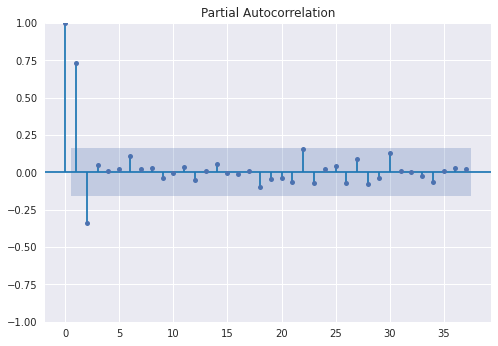

In [219]:
ysss = mystic.columns.tolist()
for i in range(len(ysss)):
    with plt.style.context('seaborn'):
        fig = plt.figure(figsize=(12,6))
        ax = plt.axes()
        plt.plot(mystic[ysss[i]])
        plt.scatter(x = mystic.index.tolist(), y = mystic[ysss[i]])
        plt.title('Graph of Mystic $y_{}$'.format(ysss[i][-1]))
        plt.ylabel('$y_{}$'.format(i+1))
        plt.xlabel('$t$')
        plt.show()
    with plt.style.context('seaborn'):
        fig = plot_acf(mystic[ysss[i]], lags=int(len(mystic)/4))
    with plt.style.context('seaborn'):
        fig = plot_pacf(mystic[ysss[i]], lags=int(len(mystic)/4), method = 'ywm')

## b. Identify the corresponding ARIMA model. {-}

$y_1$:

> Calssification: AR(1)




$y_2$:

> Calssification: MA(2)




$y_3$:

> Calssification: AR(2)




$y_4$:

> Calssification: AR(2)




$y_5$:

> Calssification: MA(1) 




$y_6$:

> Calssification: AR(2)




$y_7$:

> Calssification: MA(1)




$y_8$:

> Calssification: MA(2)



\pagebreak

# Prove for MA(1) process, $y_t = \epsilon_t - \theta \epsilon_{t-1}$, the PACF at lag $k$, $$ \phi_{kk} = \frac{-\theta^k (1 - \theta^2)}{1-\theta^{2(k+1)}}, \quad k \ge 1$$


We aim to prove $\phi_{kk} = \frac{- \theta^k (1 - \theta^2)}{1-\theta^{2 (k + 1)}}, \quad k \ge 1$. To do so we will start by looking at the two equations for the recursive method from Durbin. 

$$
\begin{split}
\phi_{k+1,k+1} &= \frac{\rho(k+1)-\sum_{j=1}^k \phi_{kj}\rho(k+1-j)}{1-\sum_{j=1}^k \phi_{kj}\rho(j)} \quad (1)\\
\\
\phi_{k+1,j} &= \phi_{kj} - \phi_{k+1,k+1} \phi_{k,k+1-j} \quad 1 \le j \le k \quad (2)
\end{split}
$$

We also know the two following to be true for an MA($1$) process, $\rho_y(k) = 0$ when $k > 1$, $\rho(1) = \frac{-\theta}{1 + \theta^2}$. Thus, $\phi_{11} = \rho(1)$.

We start by noticing that we can augment $(1)$. We can see that $\rho(k + 1) = 0$ and that the summation in the numerator will only leave one term and that is when $j = k$. In the denominator the summation will only leave one term when $j = 1$. Thus $(1)$ becomes, 

$$
\phi_{k+1, k+1} = \frac{-\phi_{kk}\rho(1)}{1 - \phi_{k1} \rho(1)} \quad (3)
$$

We then use $(2)$ to find the unknown, $\phi_{k1}$. We then set $k = k-1$ and $j = 1$ and solve for the unknown. 

$$
\phi_{k1} = \phi_{k-1,1} - \phi_{kk} \phi_{k-1,k-1} \quad 1 \le j \le k \quad (4)
$$

We then do the same procedure for $(3)$ and solve for $\phi_{k-1,1}$. We arrive at,

$$
\phi_{k-1,1} = \frac{\phi_{k-1,k-1}}{\phi_{kk}} + \frac{1}{\rho(1)} \quad (5)
$$

Using $(5) \text{ and } (4)$ on $(3)$ and canceling we arrive at.

$$
\phi_{k+1,k+1} = \frac{- \phi_{kk}}{\phi_{k-1,k-1}(\phi_{kk} - \frac{1}{\phi_{kk}})} \quad (6)
$$

Stating the following and then solving:

$$
\begin{split}
\phi_{kk} &= \frac{-\theta^k(1-\theta^2)}{1-\theta^{2(k+1)}} \quad (7)\\
\\
\phi_{k-1,k-1} &= \frac{-\theta^{k-1}(1-\theta^2)}{1-\theta^{2(k)}} \quad (8)\\
\end{split}
$$

Using $(7) \text{ and } (8)$, $(6)$ simplifies to,


$$
\phi_{k+1,k+1} = \frac{-\theta^{k+1}(1 - \theta^2)}{1 - \theta^{2(k+2)}} \quad (9)
$$

Since $(9)$ is solving for the next $\phi$ from our current time-step, we simply set $k = k-1$ and we arrive at our final solution.

$$
\phi_{kk} = \frac{-\theta^{k}(1 - \theta^2)}{1 - \theta^{2(k+1)}}
$$

# Table B.22 contains data from the Danish Energy Agency on Danish crude oil production. Develop an appropriate ARIMA model for this data. Compare this model with the smoothing models developed in Exercises 4.46 and 4.47.

Exercise 5.41 in the Book

In [220]:
'''importing the data'''
dea = pd.read_excel('data.xlsx', sheet_name='B.22-CRUDEOIL', skiprows=[i for i in range(3)]).set_index(['Year'])
dea[dea == '--'] = np.nan
'''Properly formatting the data'''
dea_formatted = pd.DataFrame(
    index = ['{}-0{}'.format(int(i),j) if j <= 9 else '{}-{}'.format(int(i),j)
    for i in range(2001, 2015) for j in range(1,13)], columns=['production'])

for i in range(12, len(dea_formatted)+12, 12):
    dea_formatted.iloc[i-12:i] = np.array([dea.iloc[int((i-12)/12)].values]).T


dea_fin = dea_formatted.dropna()
dea_fin.index = pd.DatetimeIndex(dea_fin.index)


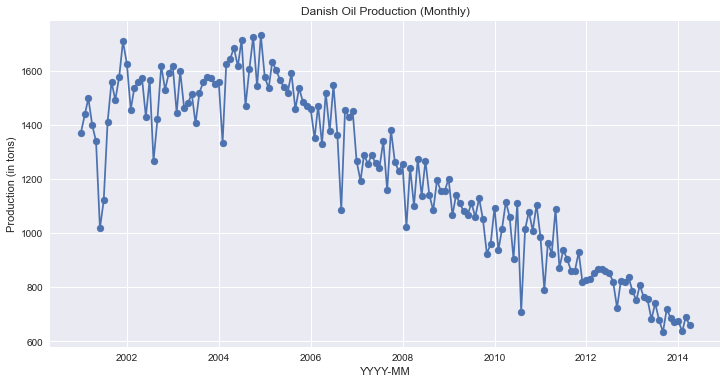

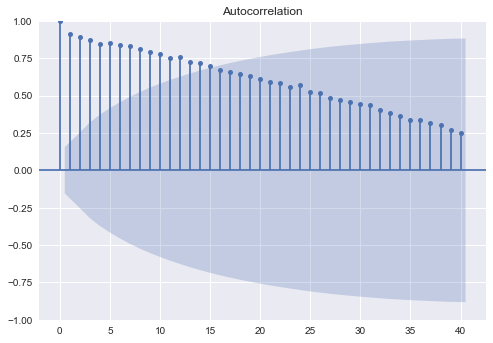

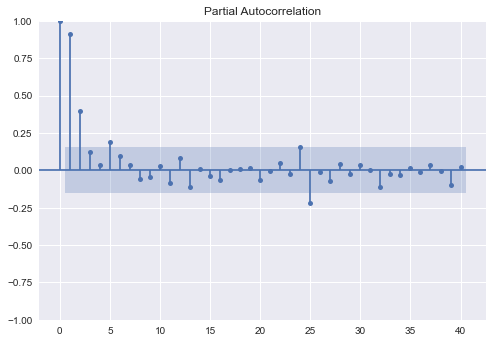

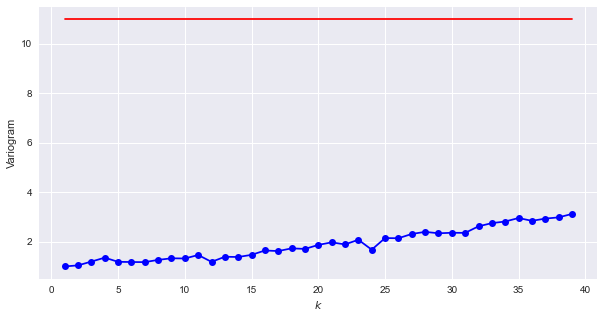

In [221]:
'''Graphing the Raw Data'''
with plt.style.context('seaborn'):
    fig = plt.figure(figsize=(12,6))
    ax = plt.axes()
    plt.plot(dea_fin)
    plt.scatter(x = dea_fin.index.tolist(), y = dea_fin.values)
    plt.title('Danish Oil Production (Monthly)')
    plt.ylabel('Production (in tons)'.format(i+1))
    plt.xlabel('YYYY-MM')
    plt.show()
with plt.style.context('seaborn'):
    fig = plot_acf(dea_fin, lags=int(len(dea_fin)/4))
with plt.style.context('seaborn'):
    fig = plot_pacf(dea_fin, lags=int(len(dea_fin)/4), method = 'ywm')

'''Variogram'''
r1 = ts.acf(dea_fin['production'], nlags=int(len(dea_fin)/4))[1]
base_var  = np.var(dea_fin['production'])

variogram = pd.DataFrame(index = [i for i in range(1,int(len(dea_fin)/4))])
variogram['lagged'] = [np.var(np.array(dea_fin['production'].iloc[i:]) - np.array(dea_fin['production'].iloc[:-i]))/np.var(np.diff(dea_fin['production'])) for i in range(1,int(len(dea_fin)/4))]
variogram ['asymp'] = [1/(1-r1) for i in range(len(variogram))]

with plt.style.context('seaborn'):
    fig = plt.figure(figsize=(10,5))
    ax = plt.axes()
    plt.plot(variogram['lagged'], c = 'Blue', marker = 'o')
    plt.plot(variogram['asymp'], c = 'Red')
    ax.set_xlabel('$k$')
    ax.set_ylabel('Variogram')
    plt.show()

In [222]:
'''ADF Test'''
md('The ADF test statistic is ${}$ and the p-value is ${}$'.format(round(ts.adfuller(dea_fin)[0],5),round(ts.adfuller(dea_fin)[1],5))) 

The ADF test statistic is $0.89789$ and the p-value is $0.99306$

## Comments

We can clearly see that this process is not stationary. Thus we are going to perform a differencing method and retest. 

In [223]:
'''lag-1 difference'''
dea_dif1 = pd.DataFrame([dea_fin.iloc[i-1].values - dea_fin.iloc[i].values for i in range(1,len(dea_fin))],
index = dea_fin.index.to_list()[1:], columns=['production'])


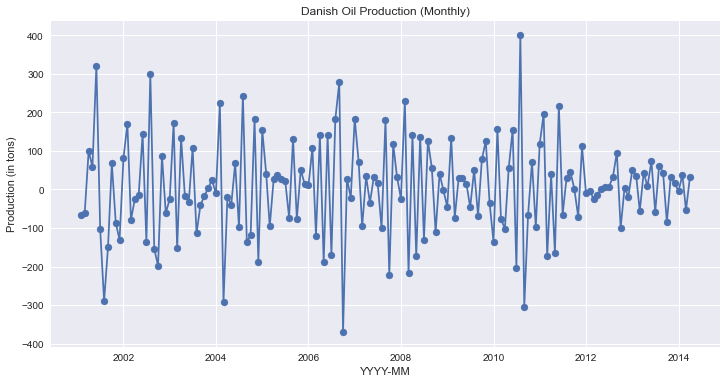

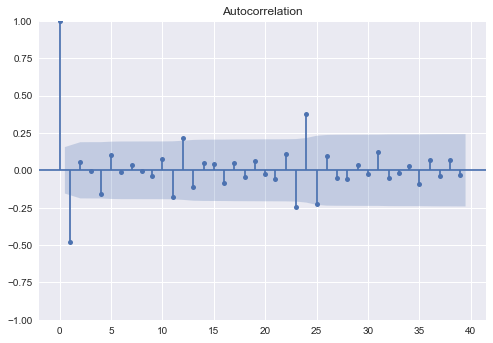

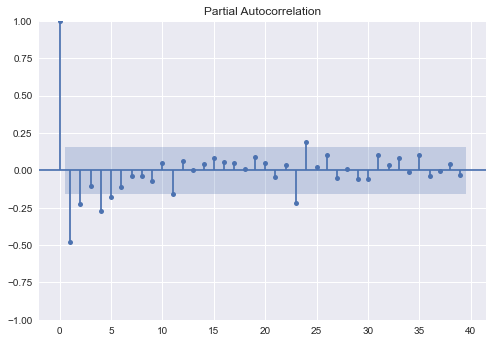

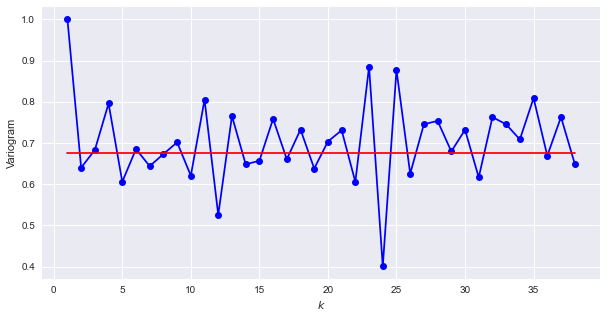

In [224]:
'''Graphing the Raw Data'''
with plt.style.context('seaborn'):
    fig = plt.figure(figsize=(12,6))
    ax = plt.axes()
    plt.plot(dea_dif1)
    plt.scatter(x = dea_dif1.index.tolist(), y = dea_dif1.values)
    plt.title('Danish Oil Production (Monthly)')
    plt.ylabel('Production (in tons)'.format(i+1))
    plt.xlabel('YYYY-MM')
    plt.show()
with plt.style.context('seaborn'):
    fig = plot_acf(dea_dif1, lags=int(len(dea_dif1)/4))
with plt.style.context('seaborn'):
    fig = plot_pacf(dea_dif1, lags=int(len(dea_dif1)/4), method = 'ywm')

'''Variogram'''
r1 = ts.acf(dea_dif1['production'], nlags=int(len(dea_dif1)/4))[1]
base_var  = np.var(dea_dif1['production'])

variogram = pd.DataFrame(index = [i for i in range(1,int(len(dea_dif1)/4))])
variogram['lagged'] = [np.var(np.array(dea_dif1['production'].iloc[i:]) - np.array(dea_dif1['production'].iloc[:-i]))/np.var(np.diff(dea_dif1['production'])) for i in range(1,int(len(dea_dif1)/4))]
variogram ['asymp'] = [1/(1-r1) for i in range(len(variogram))]

with plt.style.context('seaborn'):
    fig = plt.figure(figsize=(10,5))
    ax = plt.axes()
    plt.plot(variogram['lagged'], c = 'Blue', marker = 'o')
    plt.plot(variogram['asymp'], c = 'Red')
    ax.set_xlabel('$k$')
    ax.set_ylabel('Variogram')
    plt.show()

In [225]:
'''ADF Test'''
md('The ADF test statistic is ${}$ and the p-value is ${}$'.format(round(ts.adfuller(dea_dif1)[0],5),round(ts.adfuller(dea_dif1)[1],5))) 

The ADF test statistic is $-8.73308$ and the p-value is $0.0$

## Comments

We can now see that the process is clearly stationary. With this new transformation and the graphs of the PACF and ACF we have our ARIMA($p, \ d, \ q$) model will have $d =1$. BAsed on the tables of PACF and ACF of ARMA($1$, $1$), we see $p=1, \ q=1$. Thus our model identification leaves us with an ARIMA($1, \ 1, \ 1$) process.  

In [226]:
'''Fitting the Arima(1,1,1) process'''
dea_fin_fit = dea_fin.astype(float).reset_index(drop=True) 
model = ARIMA(dea_fin_fit, order=(1,1,1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             production   No. Observations:                  160
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -962.293
Date:                Fri, 04 Nov 2022   AIC                           1930.587
Time:                        19:36:08   BIC                           1939.794
Sample:                             0   HQIC                          1934.326
                                - 160                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0330      0.101      0.328      0.743      -0.165       0.231
ma.L1         -0.7139      0.075     -9.580      0.000      -0.860      -0.568
sigma2      1.053e+04    907.601     11.601      0.000    8750.356    1.23e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                19.57
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               0.47   Skew:                            -0.46
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [227]:
dea_arma111 = pd.DataFrame(index = dea_fin.index, columns = ['production'])
dea_arma111['production'] = model_fit.fittedvalues.values
dea_arma111 = dea_arma111.iloc[1:]


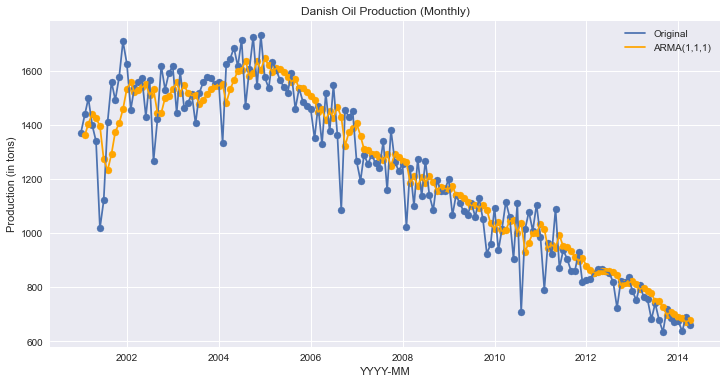

In [228]:
'''Graphing the Raw Data'''
with plt.style.context('seaborn'):
    fig = plt.figure(figsize=(12,6))
    ax = plt.axes()
    plt.plot(dea_fin, label = 'Original')
    plt.scatter(x = dea_fin.index.tolist(), y = dea_fin.values)
    plt.plot(dea_arma111, c = 'orange', label = 'ARMA(1,1,1)')
    plt.scatter(x = dea_arma111.index.tolist(), y = dea_arma111.values, c = 'orange')
    plt.legend()
    plt.title('Danish Oil Production (Monthly)')
    plt.ylabel('Production (in tons)'.format(i+1))
    plt.xlabel('YYYY-MM')
    plt.show()

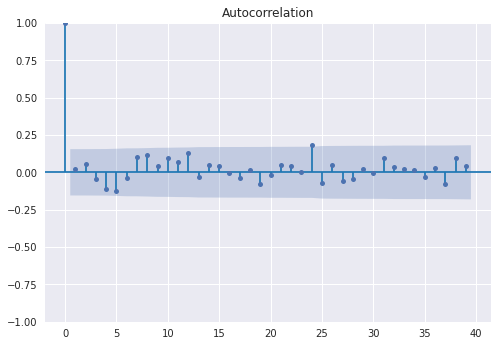

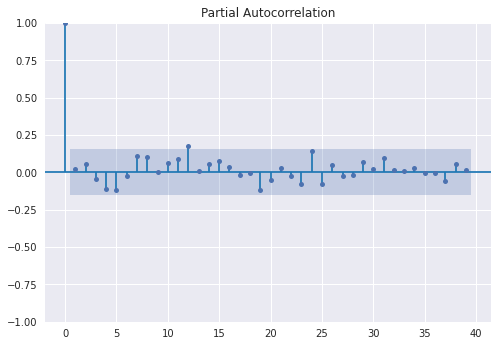

In [229]:
with plt.style.context('seaborn'):
    fig = plot_acf(model_fit.resid, lags=int(len(dea_dif1)/4))
with plt.style.context('seaborn'):
    fig = plot_pacf(model_fit.resid, lags=int(len(dea_dif1)/4), method = 'ywm')

It is safe to say that we have a better fit than from model. Reffering to my Test1.pdf file that has the following models for 4.46 and 4.47. We can see that this model fit based on the grapoh does not seem to fit as well. Granted the best part fo ARIMA is that we can forecast over a prediction interval provding better forecasting use.

# An ARIMA model has been fit to a time series, resulting in $$\hat{y}_t = 25 + 0.35y_{t-1} +\epsilon_t $$  

Exercise 5.50 in Book

## Suppose that we are at time period $T = 100$ and $y_{100} = 31$. Determine forecasts for periods $101$, $102$, $103$, ... from this model at origin $100$.

I programmed the calculations instead of doing by hand. The calculations were done as follows.

$$
\begin{split}
\hat{y}_{101} &= 25 + 0.35y_{100}\\
\\ 
\hat{y}_{102} &= 25 + 0.35\hat{y}_{101}\\
\\ 
\hat{y}_{103} &= 25 + 0.35\hat{y}_{102}\\
\\ 
&. \\
&. \\
&. \\
\hat{y}_{111} &= 25 + 0.35\hat{y}_{110}\\
\end{split}
$$

In [230]:
forecasts = [31]
for i in range(11):
    yhat = 25 + 0.35*forecasts[i]
    forecasts.append(yhat)
forecasts = forecasts[1:]
idx = ['${}$'.format(i) for i in range(101,112)]
yhat_df = pd.DataFrame(forecasts,index=idx, columns = ['$\hat{y}_t$'])
yhat_df.index.name = '$t$'
md(yhat_df.to_markdown())

| $t$   |   $\hat{y}_t$ |
|:------|--------------:|
| $101$ |       35.85   |
| $102$ |       37.5475 |
| $103$ |       38.1416 |
| $104$ |       38.3496 |
| $105$ |       38.4223 |
| $106$ |       38.4478 |
| $107$ |       38.4567 |
| $108$ |       38.4599 |
| $109$ |       38.461  |
| $110$ |       38.4613 |
| $111$ |       38.4615 |

## What is the shape of the forecast function from this model?

I chose just to graph it for ease. The shape as we can see is increasing but the rate which it increases is decreasing with every time step.

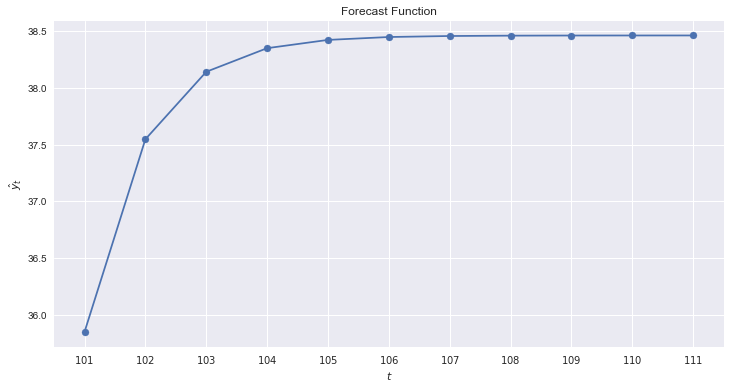

In [231]:
with plt.style.context('seaborn'):
    fig = plt.figure(figsize=(12,6))
    ax = plt.axes()
    plt.plot(yhat_df)
    plt.scatter(yhat_df.index, yhat_df.values)
    ax.set_xlabel('$t$')
    ax.set_ylabel('$\hat{y}_t$')
    plt.title('Forecast Function')
    plt.show()

## Suppose that the observation for time period $101$ turns out to be $y_{101} = 33$. Revise your forecasts for periods $102$, $103$, ... using period $101$ as the new origin of time.

In [232]:
forecasts = [33]
for i in range(10):
    yhat = 25 + 0.35*forecasts[i]
    forecasts.append(yhat)
forecasts = forecasts[1:]
idx = ['${}$'.format(i) for i in range(102,112)]
yhat_df = pd.DataFrame(forecasts,index=idx, columns = ['$\hat{y}_t$'])
yhat_df.index.name = '$t$'
md(yhat_df.to_markdown())

| $t$   |   $\hat{y}_t$ |
|:------|--------------:|
| $102$ |       36.55   |
| $103$ |       37.7925 |
| $104$ |       38.2274 |
| $105$ |       38.3796 |
| $106$ |       38.4329 |
| $107$ |       38.4515 |
| $108$ |       38.458  |
| $109$ |       38.4603 |
| $110$ |       38.4611 |
| $111$ |       38.4614 |

## If your estimate $\hat{\sigma}^2 = 2$, find a 95% prediction interval on the forecast of period $101$ made at the end of period $100$.

Assuming the forecast errors are normally distributed and a 95% confidence interval. Our calculations are as follows.

$$\hat{y}_{101} \pm 1.96\sqrt{2}$$

Thus, 

Upper Bound $= \hat{y}_{101} + 1.96\sqrt{2} = 35.85 + 1.96\sqrt{2} = 38.6219$

Lower Bound $= \hat{y}_{101} - 1.96\sqrt{2} = 35.85 - 1.96\sqrt{2} = 33.0781$